Team member 1: Michael Brown (UBIT Name: mpbrown || UBIT number: 50158715)
<br /> Team member 2: Birender Singh (UBIT Name: birender || UBIT number: 50288934) 

### Plot 1: Influenza positive tests reported to CDC by US Public Health Laboratories 2018-19 season

This plot uses the file :  FluView_StackedColumnChart_Data.csv

Functions used:

1. Interaction: computes a factor which represents the interaction of the given factors. The result of interaction is always unordered.

2. FormatC: Formatting numbers individually and flexibly, formatC() using C style format specifications

3. as.numeric: Creates or coerces objects of type "numeric"

4. seq.int(from, to, by, length.out, along.with, …) : Generate regular sequences. seq is a standard generic with a default method. seq.int is a primitive which can be much faster but has a few restrictions. seq_along and seq_len are very fast primitives for two common cases.

5. reshape2: eshape2 is based around two key functions: melt and cast: melt takes wide-format data and melts it into long-format data.cast takes long-format data and casts it into wide-format data.Think of working with metal: if you melt metal, it drips and becomes long. If you cast it into a mould, it becomes wide.

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Loading required package: reshape2
Warning message:
"package 'reshape2' was built under R version 3.5.2"

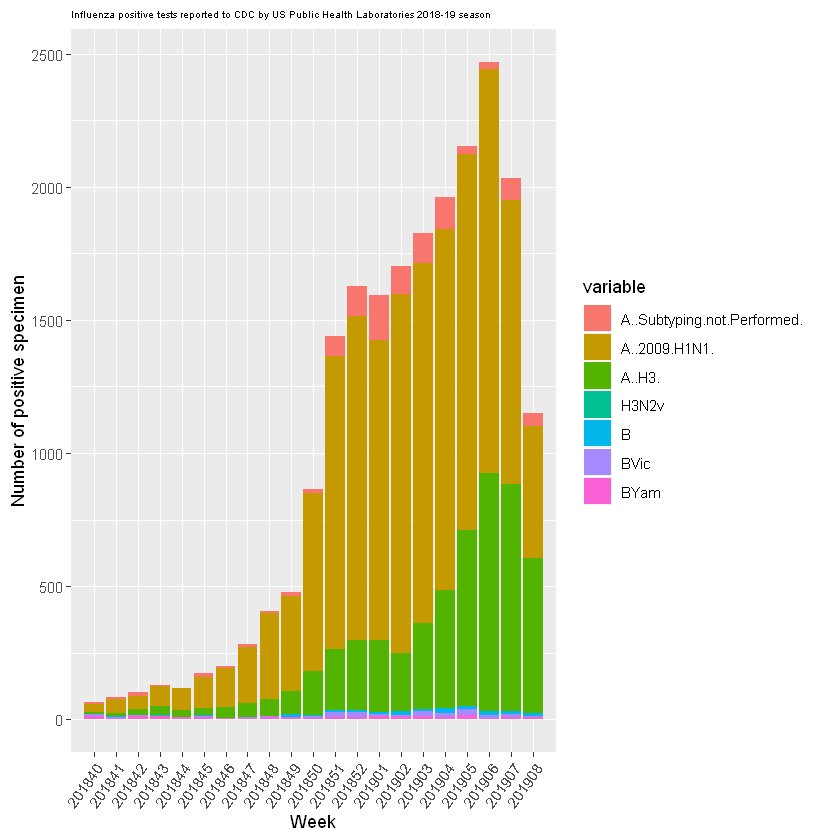

In [2]:
{
  library(ggplot2)
  
  flu_data<-read.csv("FluView_StackedColumnChart_Data.csv")
  
  flu_data<-transform(flu_data,weekcount=interaction(flu_data$YEAR,formatC(flu_data$WEEK, width=2, flag = "0"), sep=''))
  flu_data$weekcount<-as.numeric(as.character(flu_data$weekcount))
  
  flu_data$ID <- seq.int(nrow(flu_data))
  sub<-flu_data[,c('A..Subtyping.not.Performed.','A..2009.H1N1.','A..H3.','H3N2v','B','BVic','BYam','ID')]
  # sub
  require(reshape2)
  plot_data <- melt(sub, id.var='ID')
  
  ggplot(plot_data, aes(x = ID, y = value,fill=variable)) +
    geom_bar(stat = "identity")+
    scale_x_discrete(limit = flu_data$ID,
                     labels = flu_data$weekcount)+
    theme(axis.text.x = element_text(angle = 55, hjust = 1))+
    xlab("Week")+
    ylab("Number of positive specimen")+
    ggtitle("Influenza positive tests reported to CDC by US Public Health Laboratories 2018-19 season")+
    theme(plot.title = element_text(size=6))
}

### Plot 2: 2018-19 Influenza Season Week 9 ending Mar 02, 2019

Warning message:
"package 'ggmap' was built under R version 3.5.2"Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Warning message:
"package 'maps' was built under R version 3.5.2"Warning message:
"package 'usmap' was built under R version 3.5.2"Warning message:
"package 'tidyr' was built under R version 3.5.2"
Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



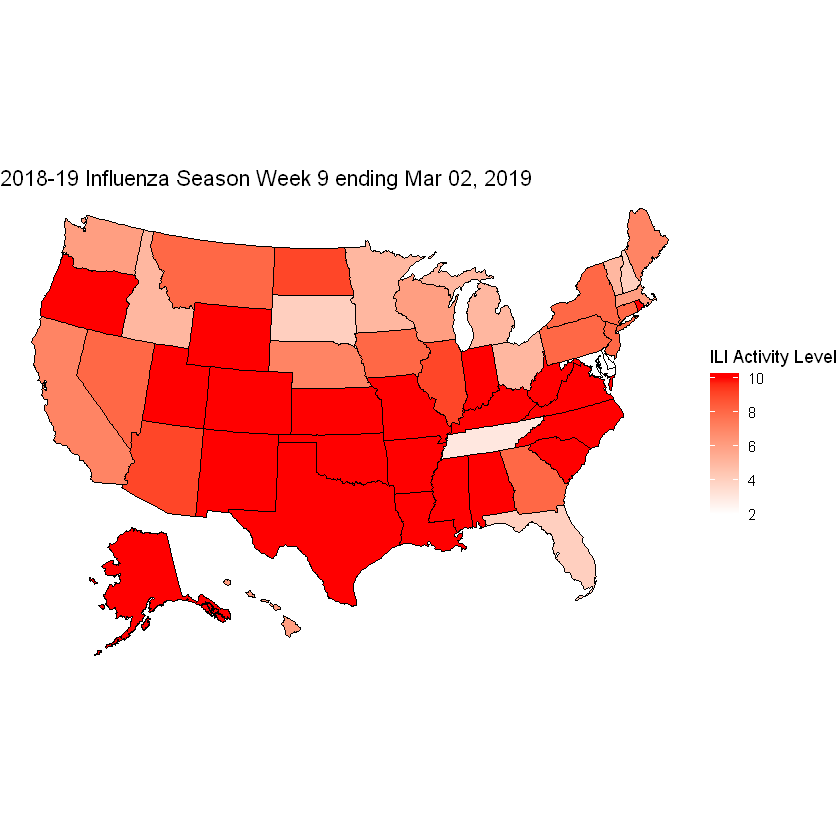

In [3]:
# Plot 2
{
  library(ggmap)
  library(maps)
  library(usmap)
  library(tidyr)
  library(dplyr)
  heat_data<- read.csv(file = "Data/StateDataforMap_2018-19week9.csv")
  # x1
  heat_data$Val<- gsub("[^0-9\\.]","", heat_data$ACTIVITY.LEVEL)
  heat_data$Val<-as.integer(heat_data$Val)
  
  heat_data <- rename(heat_data, state = STATENAME)
  
  
  gplot <- plot_usmap(regions = "states", data = heat_data, values = "Val", lines = "black")+
    scale_fill_continuous(low = "white", high = "red", name = "ILI Activity Level", label = scales::comma)+
    theme(legend.position = "right")
  
  gplot <- gplot + ggtitle("2018-19 Influenza Season Week 9 ending Mar 02, 2019")
  gplot <- gplot + theme_void()
  
  gplot
}

### Plot 3: Pneumonia and Influenza Mortality from the National Center for Health Statistics Mortality Surveillance System

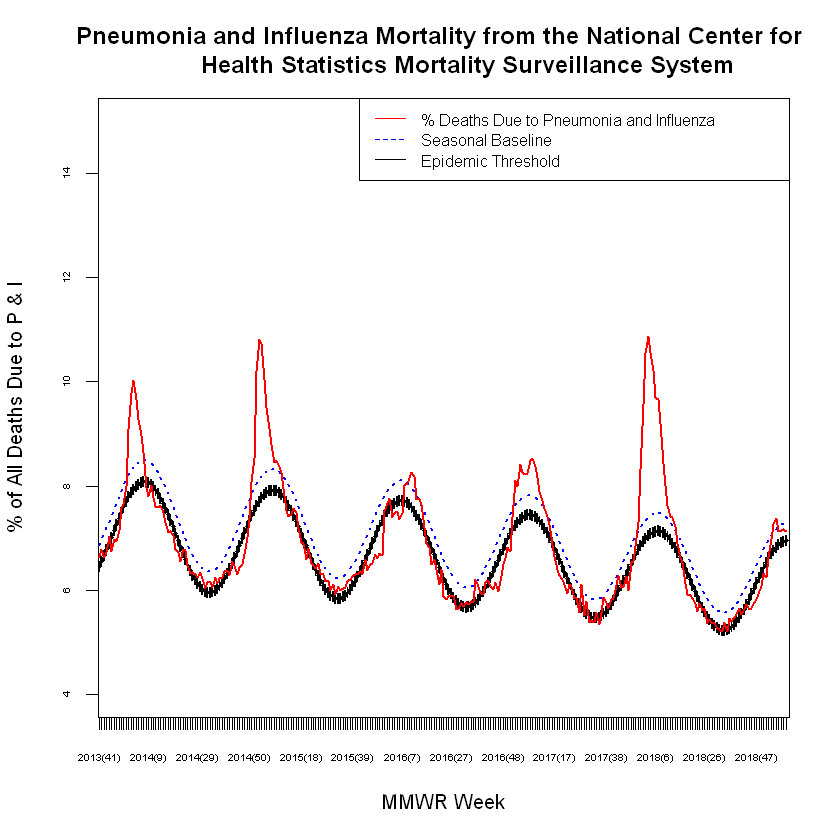

In [4]:
# Plot 3

{
  my_data <-read.csv("Data/NCHSData08.csv")
  
  my_data$Year.Week <- paste(my_data$Year,"(" ,my_data$Week, ")")
  my_data$Year.Week<-gsub(" ","",my_data$Year.Week)
  
  x1 <- factor(as.character(my_data$Year.Week))
  x1 <- factor(as.character(my_data$Year.Week), levels=unique(x1))
  
  plot(x1, my_data$Expected, pch ='.',main = "Pneumonia and Influenza Mortality from the National Center for 
       Health Statistics Mortality Surveillance System",type="n", xlim = c(220,480),ylim=c(4,15), 
       xlab="MMWR Week", ylab="% of All Deaths Due to P & I", lwd = 3, cex.axis= 0.5,arrow)
  
  lines(x1, my_data$Expected,type="l",col="black", lwd = 2)
  lines(x1, my_data$Threshold, type="l",col="blue", lwd = 2, lty = 3)
  lines(x1, my_data$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza, type="l", col="red", lwd = 2)
  
  legend(x= "topright", y=0.92, legend=c("% Deaths Due to Pneumonia and Influenza","Seasonal Baseline", "Epidemic Threshold"), col=c("red", "blue","black"), lty=1:2, cex=0.8)
}

### Plot 4: Percentage of Visits for Influenza-like Illness (ILI) Reported by the U.S. Outpatient Influenza-like Illness Surveillance Network(ILINET), Weekly National Summary, 2018-2019 and Selected Previous Seasons

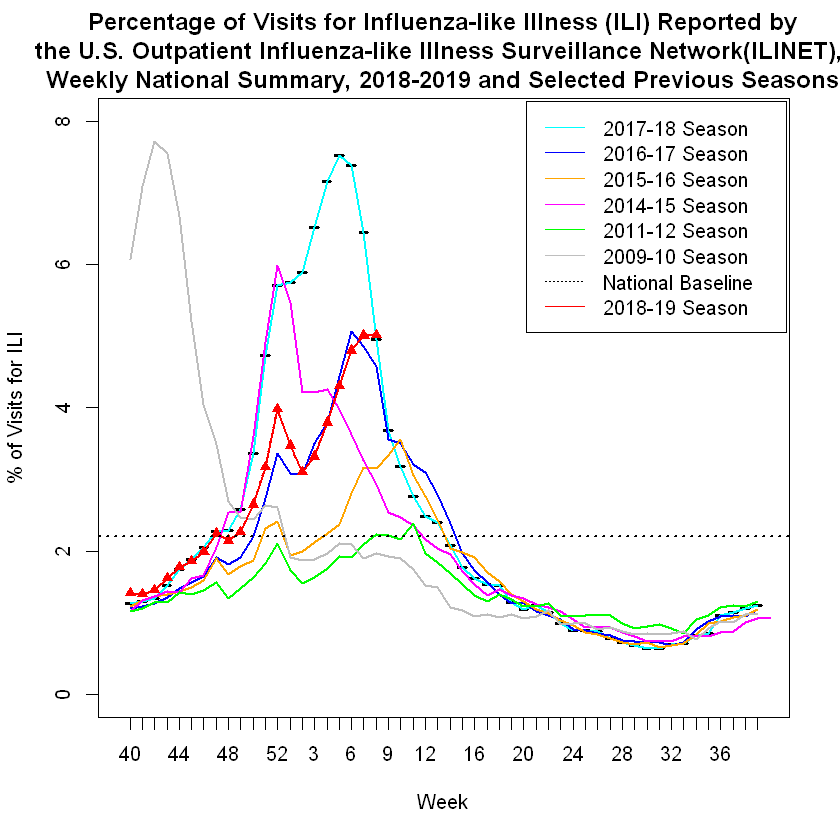

In [5]:
# Plot 4

{
  year1 <- read.csv("Data/2017-18.csv")
  year2 <- read.csv("Data/2016-17.csv")
  year3 <- read.csv("Data/2015-16.csv")
  year4 <- read.csv("Data/2014-15.csv")
  year5 <- read.csv("Data/2011-12.csv")
  year6 <- read.csv("Data/2009-10.csv")
  year7 <- read.csv("Data/2018-19.csv")
  
  years<- list(year1,year2,year3,year4,year5,year6,year7)
  colors<- c("cyan","blue","orange","magenta","green","gray","red")
  
  temp <- factor(as.character(year1$WEEK))
  temp <- factor(as.character(year1$WEEK), levels=unique(temp))
  
  plot(temp,year1$WEIGHTED.ILI,main = "Percentage of Visits for Influenza-like Illness (ILI) Reported by
the U.S. Outpatient Influenza-like Illness Surveillance Network(ILINET), 
Weekly National Summary, 2018-2019 and Selected Previous Seasons",type="l",xlab="Week", ylab="% of Visits for ILI",ylim=c(0,8), lwd = 1)
  
  for(i in 1:length(years)){
    week<-years[[i]]$WEEK
    wili<-years[[i]]$WEIGHTED.ILI
    week<- factor(as.character(week), levels=unique(week))
    lines(week,wili, type="l",col=colors[[i]], lwd = 2)
  }
  lines(week,wili, type="o",pch = 17,col=colors[[i]], lwd = 2, lty = 3)
  abline(h=2.2,col="black", lwd = 2, lty = 3)
  legend("topright", inset=.005, 
         c("2017-18 Season","2016-17 Season","2015-16 Season","2014-15 Season",
           "2011-12 Season","2009-10 Season","National Baseline","2018-19 Season"),
         col=c("cyan","blue","orange","magenta","green","gray","black","red"),
         lty = c(1,1,1,1,1,1,3,1))
  
}

### Plot 5: Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories 2018-2019 Season

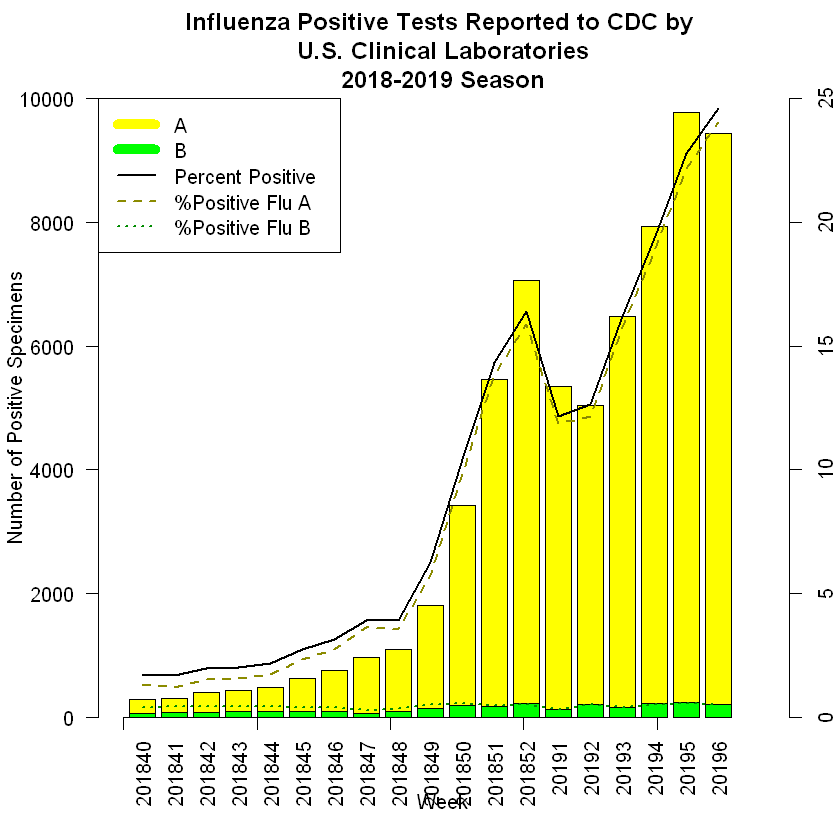

In [6]:
# Plot 5

{
  flu_data <- read.csv("Data/WHO_NREVSS_Clinical_Labs.csv")
  
  C <- paste(flu_data$YEAR, flu_data$WEEK, sep='')
  
  data<-cbind(flu_data$TOTAL_B, flu_data$TOTAL_A)
  colnames(data)=c("B", "A")
  rownames(data)=c(C)
  
  bar <- barplot(as.matrix(t(data)), main="Influenza Positive Tests Reported to CDC by 
U.S. Clinical Laboratories
2018-2019 Season",xlab= "Week" ,ylab= "Number of Positive Specimens", ylim=c(0, 10000), xlim=c(0, 24), col=c("green","yellow"), las=2)
  lines(x = bar, y=flu_data$PERCENT_POSITIVE*400, lwd=2)
  lines(x = bar, y=flu_data$PERCENT_A*400, col="yellow4",  lwd=2, lty=2)
  lines(x = bar, y=flu_data$PERCENT_B*400, col="green4",  lwd=2, lty=3)
  legend("topleft", legend=c("A", "B", "Percent Positive", "%Positive Flu A", "%Positive Flu B"), lty=c(1, 1, 1, 2, 3), col=c("yellow", "green", "black", "yellow4", "green4"), lwd=c(8,8,2,2,2))
  axis(4, c(0, 2000, 4000, 6000, 8000, 10000), c(0, 5, 10, 15, 20, 25))
  axis(1, labels = FALSE)
}

### Plot 6: Influenza Positive Tests Reported to CDC by  U.S. Clinical Laboratories for 52 Weeks of 2018

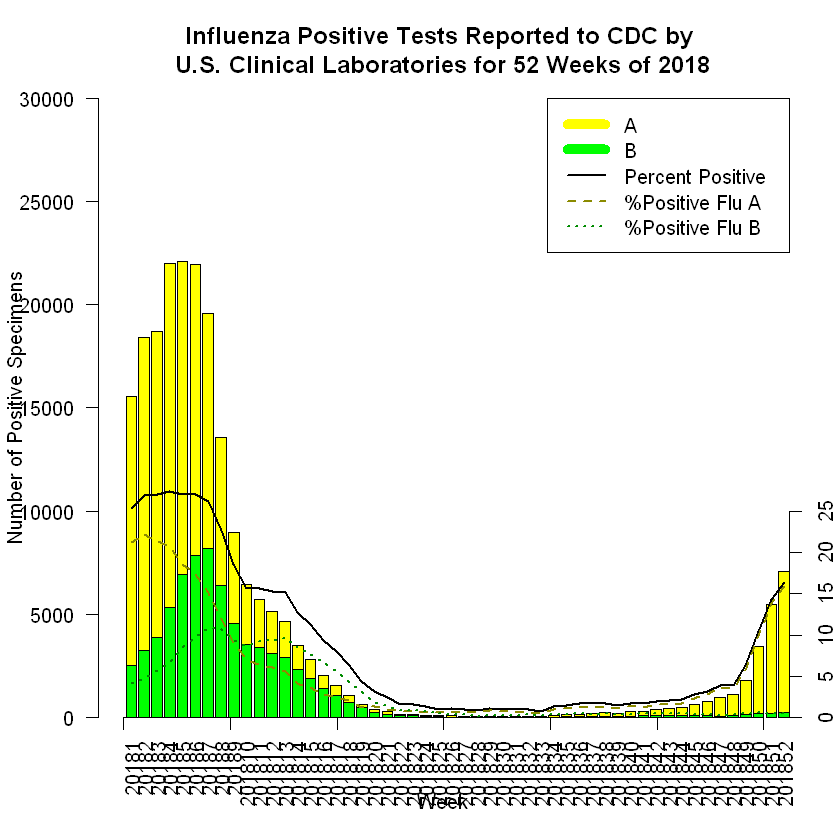

In [11]:
# Plot 6 - National 52 Weeks 2018 Clinical Labs
{
  flu_data <- read.csv("Data/national/WHO_NREVSS_Clinical_Labs.csv")
  flu_data <- subset(flu_data, YEAR == "2018")
  
  C <- paste(flu_data$YEAR, flu_data$WEEK, sep='')
  
  data<-cbind(flu_data$TOTAL.B, flu_data$TOTAL.A)
  colnames(data)=c("B", "A")
  rownames(data)=c(C)
  
  bar <- barplot(as.matrix(t(data)), main="Influenza Positive Tests Reported to CDC by 
U.S. Clinical Laboratories for 52 Weeks of 2018",xlab= "Week" ,ylab= "Number of Positive Specimens", ylim=c(0, 30000), xlim=c(0, 60), col=c("green","yellow"), las=2)
  lines(x = bar, y=flu_data$PERCENT.POSITIVE*400, lwd=2)
  lines(x = bar, y=flu_data$PERCENT.A*400, col="yellow4",  lwd=2, lty=2)
  lines(x = bar, y=flu_data$PERCENT.B*400, col="green4",  lwd=2, lty=3)
  legend("topright", legend=c("A", "B", "Percent Positive", "%Positive Flu A", "%Positive Flu B"), lty=c(1, 1, 1, 2, 3), col=c("yellow", "green", "black", "yellow4", "green4"), lwd=c(8,8,2,2,2))
  axis(4, c(0, 2000, 4000, 6000, 8000, 10000), c(0, 5, 10, 15, 20, 25))
  axis(1, labels = FALSE)
}

### Plot 7 - National 52 Weeks 2018 Public Health Labs

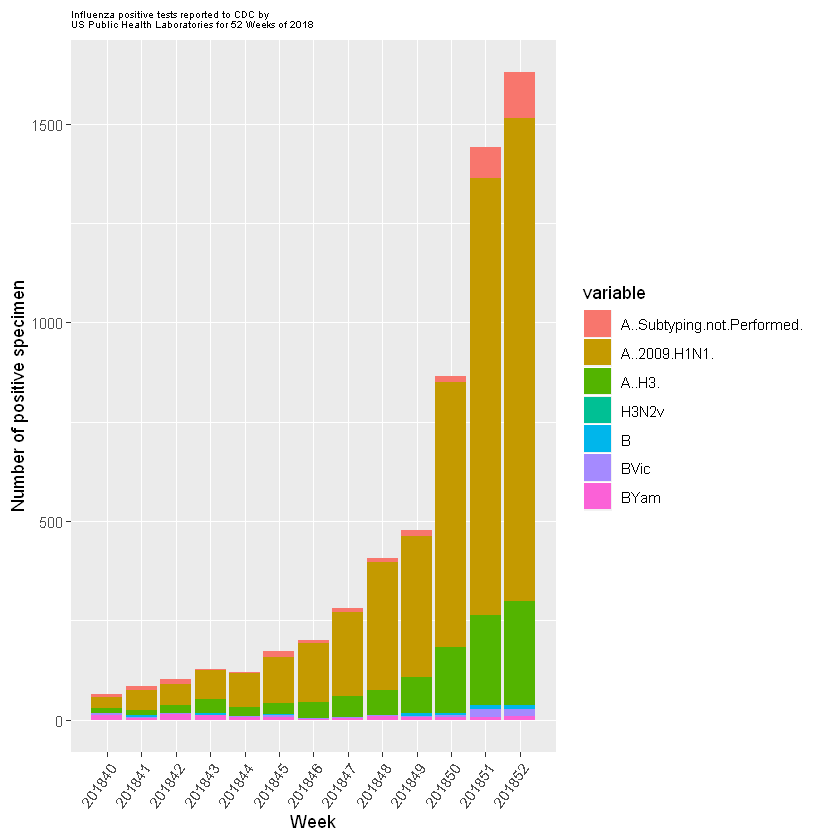

In [12]:
# Plot 7 - National 52 Weeks 2018 Public Health Labs
{
  library(ggplot2)
  
  flu_data<-read.csv("FluView_StackedColumnChart_Data.csv")
  flu_data <- subset(flu_data, YEAR == "2018")
  
  flu_data<-transform(flu_data,weekcount=interaction(flu_data$YEAR,formatC(flu_data$WEEK, width=2, flag = "0"), sep=''))
  flu_data$weekcount<-as.numeric(as.character(flu_data$weekcount))
  
  flu_data$ID <- seq.int(nrow(flu_data))
  sub<-flu_data[,c('A..Subtyping.not.Performed.','A..2009.H1N1.','A..H3.','H3N2v','B','BVic','BYam','ID')]
  # sub
  require(reshape2)
  plot_data <- melt(sub, id.var='ID')
  
  ggplot(plot_data, aes(x = ID, y = value,fill=variable)) +
    geom_bar(stat = "identity")+
    scale_x_discrete(limit = flu_data$ID,
                     labels = flu_data$weekcount)+
    theme(axis.text.x = element_text(angle = 55, hjust = 1))+
    xlab("Week")+
    ylab("Number of positive specimen")+
    ggtitle("Influenza positive tests reported to CDC by 
US Public Health Laboratories for 52 Weeks of 2018")+
    theme(plot.title = element_text(size=6))
}

### Plot 8 - Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories for 52 Weeks of 2018 - New York Only

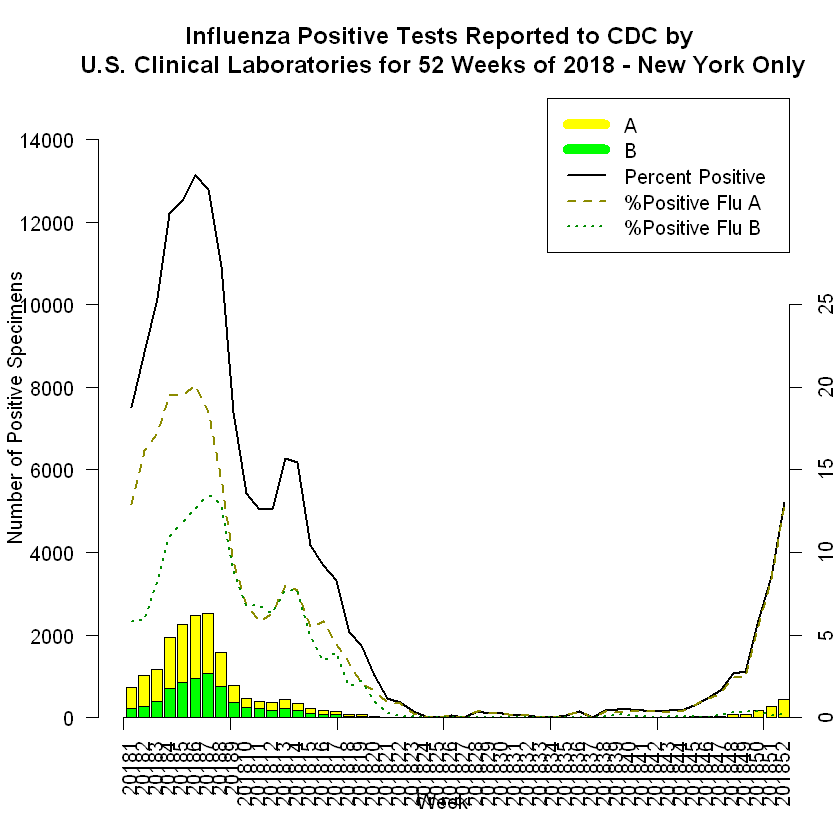

In [13]:
# Plot 8 - New York 52 Weeks 2018 Clinical Labs
{
  flu_data <- read.csv("Data/ny/WHO_NREVSS_Clinical_Labs.csv")
  flu_data <- subset(flu_data, YEAR == "2018")
  
  C <- paste(flu_data$YEAR, flu_data$WEEK, sep='')
  
  data<-cbind(flu_data$TOTAL.B, flu_data$TOTAL.A)
  colnames(data)=c("B", "A")
  rownames(data)=c(C)
  
  bar <- barplot(as.matrix(t(data)), main="Influenza Positive Tests Reported to CDC by 
U.S. Clinical Laboratories for 52 Weeks of 2018 - New York Only",xlab= "Week" ,ylab= "Number of Positive Specimens", ylim=c(0, 15000), xlim=c(0, 60), col=c("green","yellow"), las=2)
  lines(x = bar, y=flu_data$PERCENT.POSITIVE*400, lwd=2)
  lines(x = bar, y=flu_data$PERCENT.A*400, col="yellow4",  lwd=2, lty=2)
  lines(x = bar, y=flu_data$PERCENT.B*400, col="green4",  lwd=2, lty=3)
  legend("topright", legend=c("A", "B", "Percent Positive", "%Positive Flu A", "%Positive Flu B"), lty=c(1, 1, 1, 2, 3), col=c("yellow", "green", "black", "yellow4", "green4"), lwd=c(8,8,2,2,2))
  axis(4, c(0, 2000, 4000, 6000, 8000, 10000), c(0, 5, 10, 15, 20, 25))
  axis(1, labels = FALSE)
}